# Buck Converter

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec8/Slide5.PNG" align="left" width="62%">

In this lecture we continue with the analysis of buck converter based on the quasi steady state operation.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide6.PNG" align="left" width="62%">

After taking this lecture, you are supposed to know to derive various steady state equations of the buck converter by heart.
You should also be aware of the limitations of quasi steady state analysis.
Of course, these learning objectives should be based on a thorough understanding of the buck converter.

````

## Review of inductors and capacitors



````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec8/Slide7.PNG" align="left" width="62%">

The two passive components in the buck converter: inductor and capacitor, play a significant role in the buck converter analysis.
Hereby we review their behaviours.

For an inductor, the current through it cannot change instantaneously and hence we have to provide flow paths for the inductor current no matter whether the switch is on or off.
Therefore, a freewheeling diode is needed.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide8.PNG" align="left" width="62%">

For a capacitor, the voltage across it cannot change instantaneously.
When steady state is reached, the average current through the capacitor should be zero, otherwise the charge in the capacitor $Q_c$ varies from cycle to cycle, the voltage will not reach the steady state.

$$
Q_c = Cv_c = \int_t^{t+T_s}i_c\mathrm{d}t.
$$

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide9.PNG" align="left" width="62%">

If the circuit reaches steady state, we know the current and voltage waveforms should become periodic. Therefore, we know $i_L$ at the beginning of a switching cycle should match that at the end.
We also know for inductor, we have

$$
\newcommand\diff{\mathrm{d}}
v_L = L\frac{\diff i_L}{\diff t}.
$$

Then we can derive the equations shown on this slide, i.e., the average voltage across the inductor in one cycle is zero.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide10.PNG" align="left" width="62%">

Similarly, for capacitor, we have

$$
\newcommand\diff{\mathrm{d}}
i_C = C\frac{\diff v_C}{\diff t}.
$$

Then we know the average current through the capacitor in one cycle is zero.
```

````

## Steady state approximation



````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec8/Slide11.PNG" align="left" width="62%">

To simplify the analysis, we assume the buck converter circuit works at steady state.
In the previous module, when analysing the single phase and three phase AC circuits, we also made such assumption.
However, it is worth mentioning that this is just an implicit assumption.
In practical circuits, a real steady state rarely happens.
Dynamic operation or transient behaviour will occur when the steady state conditions are not met, e.g., when a sine voltage source starts to charge an inductor from zero current.

The Python script below simulates a PWM voltage source supplying a RL circuit and a RC circuit respectively.
You can see the steady state reaches only after many cycles of transients.
```

````

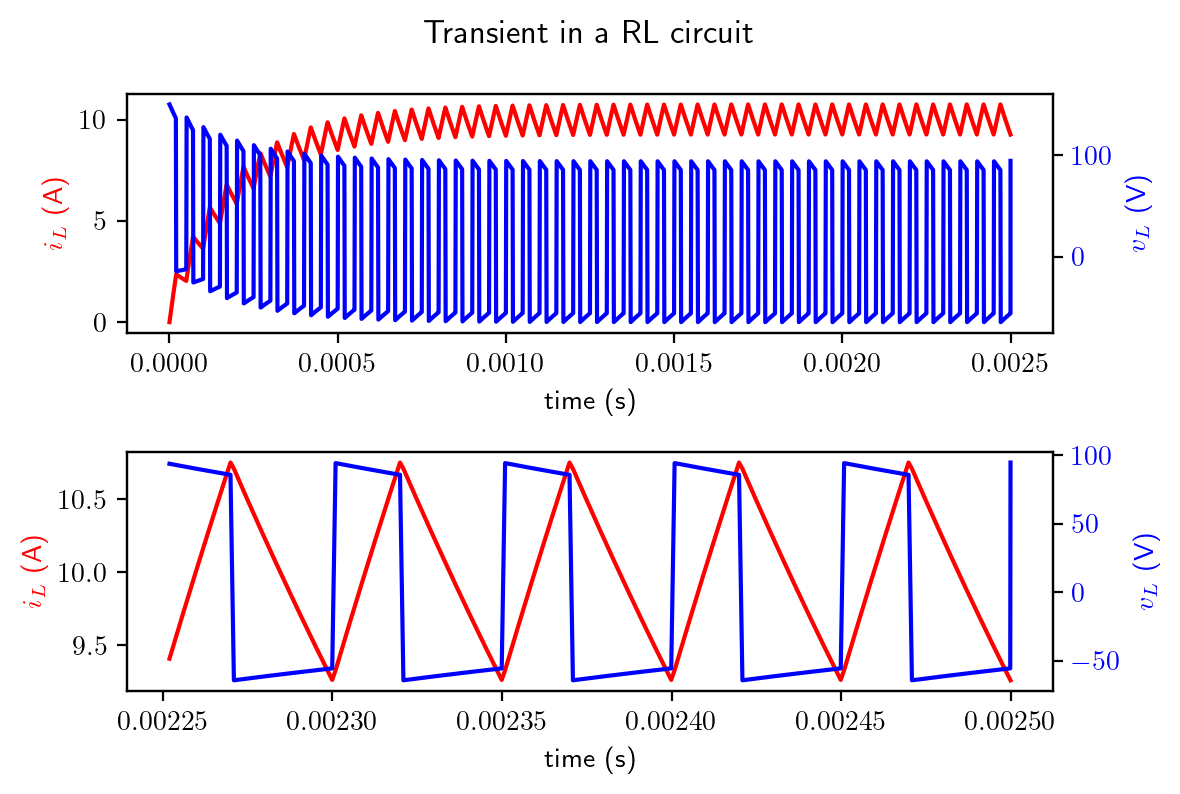

In [1]:
%reset -f
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
V_s = 150.0 # source voltage
L   = 1.2e-3 
R   = 6.0
C   = 2e-4
D   = 0.4
fs  = 20.0e3 # frequency

@np.vectorize
def v_pwm(t, D, V_s, fs):
    t = t*fs
    x_period = t % 1.0
    if x_period <= D:
        v_o = V_s
    else:
        v_o = 0
    return v_o

# models for RL circuit

def L_ode(t, i_L, R, L, V_s, D, fs):
    v_s  = v_pwm(t, D, V_s, fs)
    didt = (v_s-i_L*R)/L
    return didt

# we use Runge-Kutta method to solve the state space model

sol = solve_ivp(L_ode, (0,1/fs*50), [0], method='RK45', args=(R, L, V_s, D, fs), max_step=1/fs/50)

t = sol['t']
il = sol['y'].T

fig1, (ax1,ax3) = plt.subplots(2,1)
ax1.plot(t, il, color='red')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('$i_L$ (A)', color='red')
v_s = v_pwm(t, D, V_s, fs)
v_s = v_s[:,np.newaxis]
ax2 = ax1.twinx() 
ax2.plot(t, v_s-R*il, color='blue')
ax2.set_ylabel('$v_L$ (V)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# zoom into the last 5 cycles

ax3.plot(t[-250:], il[-250:], color='red')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('$i_L$ (A)', color='red')

ax4 = ax3.twinx() 
ax4.plot(t[-250:], v_s[-250:]-R*il[-250:], color='blue')
ax4.set_ylabel('$v_L$ (V)', color='blue')
ax4.tick_params(axis='y', labelcolor='blue')

fig1.suptitle('Transient in a RL circuit')
fig1.tight_layout()
plt.show()

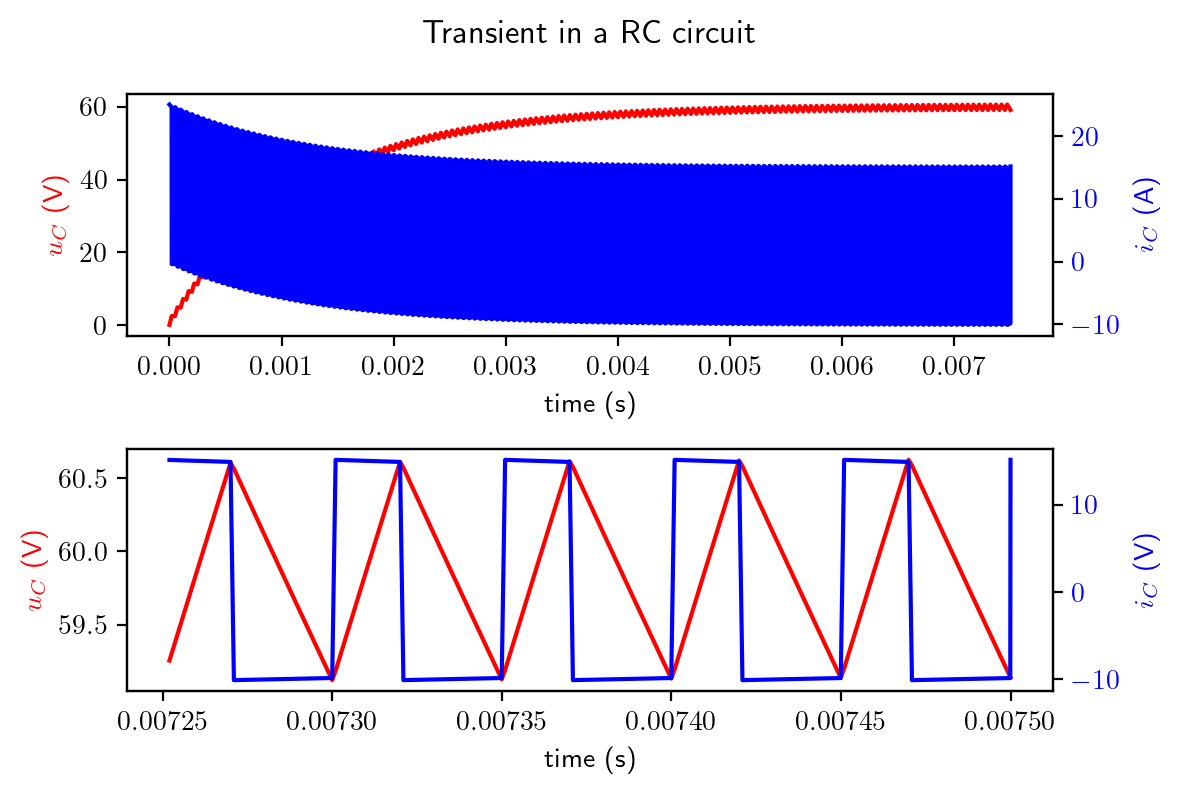

In [2]:
# models for RC circuit

def C_ode(t, u_c, R, C, V_s, D, fs):
    v_s  = v_pwm(t, D, V_s, fs)
    dudt = (v_s-u_c)/R/C
    return dudt

# we use Runge-Kutta method to solve the state space model

sol = solve_ivp(C_ode, (0,1/fs*150), [0], method='RK45', args=(R, C, V_s, D, fs), max_step=1/fs/50)

t = sol['t']
u_c = sol['y'].T

fig1, (ax1,ax3) = plt.subplots(2,1)
ax1.plot(t, u_c, color='red')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('$u_C$ (V)', color='red')
v_s = v_pwm(t, D, V_s, fs)
v_s = v_s[:,np.newaxis]
ax2 = ax1.twinx() 
ax2.plot(t, (v_s-u_c)/R, color='blue')
ax2.set_ylabel('$i_C$ (A)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# zoom into the last 5 cycles

ax3.plot(t[-250:], u_c[-250:], color='red')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('$u_C$ (V)', color='red')

ax4 = ax3.twinx() 
ax4.plot(t[-250:], (v_s[-250:]-u_c[-250:])/R, color='blue')
ax4.set_ylabel('$i_C$ (V)', color='blue')
ax4.tick_params(axis='y', labelcolor='blue')

fig1.suptitle('Transient in a RC circuit')
fig1.tight_layout()
plt.show()

## Analysis of buck converter under steady state



````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec8/Slide12.PNG" align="left" width="62%">

In additon to the steady state operation, we also make three other assumptions to simplify the analysis of the buck converter.
We assume the output capacitor is big enough, so that there is negligible ripple in $v_c$, as shown in the Python simulation above, i.e., $v_c$ can be treated as a constant.

Then we assume the inductor is big enough, so that the current ripple in the inductor is relatively low, as shown in the Python simulation above, and the current in the inductor is always above zero (continuous current operation).

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide13.PNG" align="left" width="62%">

Based on the assumptions above, we will first calculate the inductor current by assuming a constant output voltage.
Then we use the calculated inudctor current to calculate the output voltage ripple.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide14.PNG" align="left" width="62%">

Once again, we will analyse the circuit at two states: switch on (State I) and switch off (State II).

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide15.PNG" align="left" width="62%">

Based on the contant output voltage assumption, we know the current slope during State I is

$$
m_1 = \frac{\mathrm{d} i_L}{\mathrm{d} t} = \frac{V_s-V_c}{L}.
$$

The slope during State II is

$$
m_2 = \frac{\mathrm{d} i_L}{\mathrm{d} t} = \frac{-V_c}{L}.
$$

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide16.PNG" align="left" width="62%">

From the analysis above, we know the inductor current will have a triangular wave shape, as shown on the slide.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide17.PNG" align="left" width="62%">

The current ripple of through the inductor is calculated as the difference between the maximum current and the minimum current in one switching cycle, so during State I, we have

$$
\begin{align}
\Delta i_L &= I_{max}-I_{min} \\
&= (I_{min}+m_1 dT_s) - I_{min} \\
&= m_1 d T_s.
\end{align}
$$

Similarly, we would also be able to obtain the same ripple by analysing State II,

$$
\begin{align}
\Delta i_L &= I_{max}-I_{min} \\
&= I_{max} - (I_{max} + m_2 (1-d) T_s) \\
&= -m_2(1-d) T_s.
\end{align}
$$

Since the inductor current is periodic, so the two equations above should be equal, 

$$
\begin{align}
m_1 d T_s + m_2 (1-d)T_s &= 0\\
\frac{V_s-V_c}{L}\mathrm{d}T_s + \frac{-V_c}{L}(1-d)T_s &= 0\\
\longrightarrow dV_s &= V_c,
\end{align}
$$

which gives the voltage transfer equation of the buck converter.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide18.PNG" align="left" width="62%">

Then we check the current through the semiconductor devices.

During State I, switch is closed so that the inductor current can flow through the switch.
The voltage across the switch is equal to zero since we assume all components are ideal.
The voltage across the diode ($v_{pwm}$) is equal to $V_s$ and due to the characteristics
of the diode it can not conduct current from cathode to anode. 

During State II, switch is open, so the inductor current can only flow through the diode. 
At this point the voltage across the diode ($v_{pwm}$) is equal to zero and the voltage across the switch is now equal to Vs

Therefore, we know the inductor current is equal to the switch current when the switch is closed, and is equal to the diode current when the switch is open.

Hereby we will stress the necessity of the diode again.
If there is no diode in the buck converter circuit, the current in the inductor
would have to change instantaneously from some value to zero when the switch
is opened since there is no path for the current to flow.
This will result in an infinitely large voltage across the inductor, which will cause over voltage failure to the switch in practice.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide19.PNG" align="left" width="62%">

The above analysis can also be done by studying the voltage across the inductor, we know $v_L = L\frac{\mathrm{d} i_L}{\mathrm{d} t}$, so

$$
\Delta i_L = \frac{1}{L}\int_0^t v_L \mathrm{d}t
$$

At steady state, $i_L(t) = i_L(t+T_s)$, so

$$
\begin{align}
\frac{1}{L}\int_t^{t+T_s} v_L \mathrm{d}t &= 0 \\
\frac{1}{L}\int_t^{t+dT_s} v_L + \frac{1}{L}\int_{t+dT_s}^{t+T_s} v_L\mathrm{d}t &=0 \\
\longrightarrow (V_s-V_c)dT_s - V_s(1-d)T_s &= 0 \\
\longrightarrow V_c = dV_s
\end{align}
$$

Which gives use the same result as what we get before. We can visualise this equation by the figure shown on the slide: the area A and the area B must be equal, and the only time that they are equal is when $v_c = dV_s$.

From the analysis above we can also see that it is handy to analyse the DC converter using the voltage-time integral across the inductor.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec8/Slide20.PNG" align="left" width="62%">

Hereby we summarise all the waveforms we have discussed so far for the buck converter.
We will constantly use them to solve problems in the coming lectures.
```

````

## Homework

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec8/Slide21.PNG" align="left" width="62%">

A buck converter has parameters as shown on the slide, please first try to calculate the inductor current (average current and ripple) using the knowledge learnt in this lecture, then click the button below for the correct answers and a Python simulation afterwards.
```
````

In [3]:
# parameters
V_s  = 45.0
fs   = 25.0e3
L    = 1.5e-3
C    = 220e-6
R    = 8.25
d    = 0.55

# first calculate the output voltage
v_o  = V_s*d

# output current
i_o  = v_o/R

# average current in the inductor is the same as the output current
# since the capacitor works at steady state (average current is 0)
i_L_av = i_o

# current ripple
di_L   = (V_s-v_o)/L*d*1/fs

print('The average inductor current is {:.3f} A.'.format(i_L_av))
print('The inductor current ripple is {:.3f} A.'.format(di_L))

The average inductor current is 3.000 A.
The inductor current ripple is 0.297 A.


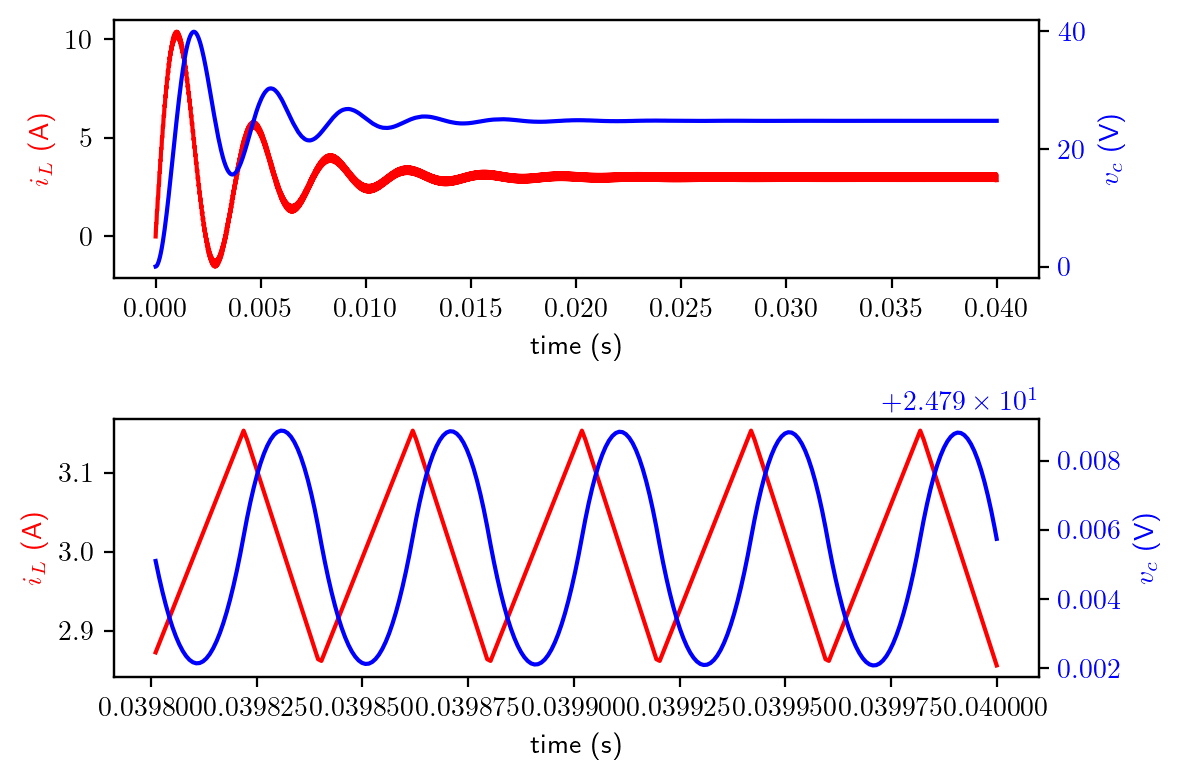

In [4]:
A   = np.array([[0, -1/L], [1/C, -1/R/C]])
B   = np.array([1/L,0])
x0  = np.array([0,0])
def buck_ode(t, x, A, B, V_s, d, Ts):
    t = t/Ts
    x_period = t % 1.0
    if x_period <= d:
        dxdt = A@x+B*V_s
    else:
        dxdt = A@x
    return dxdt

# we use Runge-Kutta method to solve the state space model

sol = solve_ivp(buck_ode, (0,1/fs*1000), x0, method='RK45', args=(A, B, V_s, d, 1/fs), max_step=1/fs/50)

t = sol['t']
il_vc = sol['y'].T

fig, (ax1,ax3) = plt.subplots(2,1)
ax1.plot(t, il_vc[:,0], color='red')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('$i_L$ (A)', color='red')

ax2 = ax1.twinx() 
ax2.plot(t, il_vc[:,1], color='blue')
ax2.set_ylabel('$v_c$ (V)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


# zoom into the last 5 cycles

ax3.plot(t[-250:], il_vc[-250:,0], color='red')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('$i_L$ (A)', color='red')

ax4 = ax3.twinx() 
ax4.plot(t[-250:], il_vc[-250:,1], color='blue')
ax4.set_ylabel('$v_c$ (V)', color='blue')
ax4.tick_params(axis='y', labelcolor='blue')
fig.tight_layout()
plt.show()